In [1]:
#!pip install pandas
#!pip install nltk
#!pip install numpy
#!pip install matplotlib
#!pip install wordcloud
#!pip install pillow
#!pip install sklearn

In [2]:
import os
import nltk
import nltk.tokenize
from nltk.tokenize import word_tokenize
import numpy as np
from matplotlib.colors import ListedColormap
import random
from nltk.corpus import words, stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [3]:
# This will give us the list of all folders in the albums folder.
# A list of albums with some system files mixed in
folder_path = 'data/Albums'
contents = os.listdir(folder_path)
contents.sort()
contents

['.DS_Store',
 '1989',
 '1989_TaylorsVersion_',
 '1989_TaylorsVersion__Deluxe_',
 '1989_TaylorsVersion__TangerineEdition_',
 '1989_TaylorsVersion__WebstoreDeluxe_',
 'AllTooWell_10MinuteVersion__TheShortFilm__EP',
 'Anti_Hero_Remixes_',
 'Carolina_FromTheMotionPictureWhereTheCrawdadsSing_',
 'Evermore',
 'Fearless',
 'Fearless_PlatinumEdition_',
 'Fearless_TaylorsVersion_',
 'Fearless_TaylorsVersion__TheFromtheVaultChapter',
 'Fearless_TaylorsVersion__TheHalfwayOuttheDoorChapter',
 'Fearless_TaylorsVersion__TheIRememberWhatYouSaidLastNightChapter',
 'Fearless_TaylorsVersion__TheKissingInTheRainChapter',
 'Folklore',
 'LavenderHaze_Remixes_',
 'Lover',
 'Lover_LiveFromParis_HeartShapedVinyl',
 'Lover_LivefromParis_',
 'MessageInABottle_FatMaxGRemix__TaylorsVersion_',
 'Midnights',
 'Midnights_3amEdition_',
 'Midnights_AppleMusicExclusive_',
 'Midnights_TargetExclusive_',
 'Midnights_TheLateNightEdition_',
 'Midnights_TheTilDawnEdition_',
 'Midnights_TheTillDawnEdition_',
 'Red',
 'Red_T

In [4]:
# Going to select only the Red (Taylor's Version) album #Support artists owning their own music
folder_path = 'data/Albums/Red_TaylorsVersion_'
contents = os.listdir(folder_path)
contents.sort()
contents

['22_TaylorsVersion_.txt',
 'AMessageFromTaylor.txt',
 'AllTooWell_10MinuteVersion__TaylorsVersion__FromtheVault_.txt',
 'AllTooWell_TaylorsVersion_.txt',
 'Babe_TaylorsVersion__FromtheVault_.txt',
 'BeginAgain_TaylorsVersion_.txt',
 'BetterMan_TaylorsVersion__FromtheVault_.txt',
 'ComeBack___BeHere_TaylorsVersion_.txt',
 'EverythingHasChanged_TaylorsVersion_.txt',
 'ForeverWinter_TaylorsVersion__FromtheVault_.txt',
 'GirlAtHome_TaylorsVersion_.txt',
 'HolyGround_TaylorsVersion_.txt',
 'IAlmostDo_TaylorsVersion_.txt',
 'IBetYouThinkAboutMe_TaylorsVersion__FromtheVault_.txt',
 'IKnewYouWereTrouble_TaylorsVersion_.txt',
 'MessageInABottle_TaylorsVersion__FromtheVault_.txt',
 'NothingNew_TaylorsVersion__FromtheVault_.txt',
 'Red_TaylorsVersion_.txt',
 'Ronan_TaylorsVersion_.txt',
 'Run_TaylorsVersion__FromtheVault_.txt',
 'SadBeautifulTragic_TaylorsVersion_.txt',
 'Starlight_TaylorsVersion_.txt',
 'StateOfGrace_AcousticVersion__TaylorsVersion_.txt',
 'StateofGrace_TaylorsVersion_.txt',
 '

In [5]:
# This will give us a list of all of the files that end with .txt
# This way if there was any other file (like album art), it would not include that in our set

red_songs = [file for file in contents if file.endswith('.txt')]

In [6]:
#Initializing an empty string, we will append all text from the songs into this string
lyrics = ""
# If there are any files in the list of song files we already created 
# Avoids errors if there was any problem when we created red_songs
if red_songs:
    for file in red_songs:
        # Define full path. Joins the path to the folder of the red album, with the song path
        file_path = os.path.join(folder_path, file)
        
        # Open the file_path with the 'r' read operation, read the whole file and append to lyrics
        with open(file_path, 'r') as file:
            lyrics += file.read()           
else:
    # If there were no song paths, just print no .txt found
    print('no .txt found')
    


In [7]:
lyrics

'27 ContributorsTranslationsFrançaisHrvatskiTürkçeEspañolPortuguês22 (Taylor’s Version) Lyrics[Verse 1]\nIt feels like a perfect night\nTo dress up like hipsters\nAnd make fun of our exes\nUh-uh, uh-uh\nIt feels like a perfect night\nFor breakfast at midnight\nTo fall in love with strangers\nUh-uh, uh-uh\n\n[Pre-Chorus]\nYeah\nWe\'re happy, free, confused, and lonely at the same time\nIt\'s miserable and magical, oh yeah\nTonight\'s the night when we forget about the deadlines\nIt\'s time, oh-oh\n[Chorus]\nI don\'t know about you\nBut I\'m feelin\' twenty-two\nEverything will be alright if\nYou keep me next to you\nYou don\'t know about me\nBut I\'ll bet you want to\nEverything will bе alright if\nWe just keep dancin\' like we\'rе\nTwenty-two\nTwenty-two\n\n[Verse 2]\nIt seems like one of those nights\nThis place is too crowded\nToo many cool kids\nUh-uh, uh-uh (Who\'s Taylor Swift anyway? Ew)\nIt seems like one of those nights\nWe ditch the whole scene\nAnd end up dreamin\'\nInstead o

In [8]:
# The word tokenizer will split the full text into words and punctuation.
lyrics_split = word_tokenize(lyrics)
lyrics_split

['27',
 'ContributorsTranslationsFrançaisHrvatskiTürkçeEspañolPortuguês22',
 '(',
 'Taylor',
 '’',
 's',
 'Version',
 ')',
 'Lyrics',
 '[',
 'Verse',
 '1',
 ']',
 'It',
 'feels',
 'like',
 'a',
 'perfect',
 'night',
 'To',
 'dress',
 'up',
 'like',
 'hipsters',
 'And',
 'make',
 'fun',
 'of',
 'our',
 'exes',
 'Uh-uh',
 ',',
 'uh-uh',
 'It',
 'feels',
 'like',
 'a',
 'perfect',
 'night',
 'For',
 'breakfast',
 'at',
 'midnight',
 'To',
 'fall',
 'in',
 'love',
 'with',
 'strangers',
 'Uh-uh',
 ',',
 'uh-uh',
 '[',
 'Pre-Chorus',
 ']',
 'Yeah',
 'We',
 "'re",
 'happy',
 ',',
 'free',
 ',',
 'confused',
 ',',
 'and',
 'lonely',
 'at',
 'the',
 'same',
 'time',
 'It',
 "'s",
 'miserable',
 'and',
 'magical',
 ',',
 'oh',
 'yeah',
 'Tonight',
 "'s",
 'the',
 'night',
 'when',
 'we',
 'forget',
 'about',
 'the',
 'deadlines',
 'It',
 "'s",
 'time',
 ',',
 'oh-oh',
 '[',
 'Chorus',
 ']',
 'I',
 'do',
 "n't",
 'know',
 'about',
 'you',
 'But',
 'I',
 "'m",
 'feelin',
 "'",
 'twenty-two',
 'Ev

In [9]:
# Will remove the words that are just punctuation (does seem to also remove words with punctuation in it)
lyrics_split = [word for word in lyrics_split if word.isalnum()]
lyrics_split

['27',
 'ContributorsTranslationsFrançaisHrvatskiTürkçeEspañolPortuguês22',
 'Taylor',
 's',
 'Version',
 'Lyrics',
 'Verse',
 '1',
 'It',
 'feels',
 'like',
 'a',
 'perfect',
 'night',
 'To',
 'dress',
 'up',
 'like',
 'hipsters',
 'And',
 'make',
 'fun',
 'of',
 'our',
 'exes',
 'It',
 'feels',
 'like',
 'a',
 'perfect',
 'night',
 'For',
 'breakfast',
 'at',
 'midnight',
 'To',
 'fall',
 'in',
 'love',
 'with',
 'strangers',
 'Yeah',
 'We',
 'happy',
 'free',
 'confused',
 'and',
 'lonely',
 'at',
 'the',
 'same',
 'time',
 'It',
 'miserable',
 'and',
 'magical',
 'oh',
 'yeah',
 'Tonight',
 'the',
 'night',
 'when',
 'we',
 'forget',
 'about',
 'the',
 'deadlines',
 'It',
 'time',
 'Chorus',
 'I',
 'do',
 'know',
 'about',
 'you',
 'But',
 'I',
 'feelin',
 'Everything',
 'will',
 'be',
 'alright',
 'if',
 'You',
 'keep',
 'me',
 'next',
 'to',
 'you',
 'You',
 'do',
 'know',
 'about',
 'me',
 'But',
 'I',
 'bet',
 'you',
 'want',
 'to',
 'Everything',
 'will',
 'bе',
 'alright',
 '

In [10]:

filtered_lyrics = [word for word in lyrics_split if len(word)>=3]

In [11]:
filtered_lyrics

['ContributorsTranslationsFrançaisHrvatskiTürkçeEspañolPortuguês22',
 'Taylor',
 'Version',
 'Lyrics',
 'Verse',
 'feels',
 'like',
 'perfect',
 'night',
 'dress',
 'like',
 'hipsters',
 'And',
 'make',
 'fun',
 'our',
 'exes',
 'feels',
 'like',
 'perfect',
 'night',
 'For',
 'breakfast',
 'midnight',
 'fall',
 'love',
 'with',
 'strangers',
 'Yeah',
 'happy',
 'free',
 'confused',
 'and',
 'lonely',
 'the',
 'same',
 'time',
 'miserable',
 'and',
 'magical',
 'yeah',
 'Tonight',
 'the',
 'night',
 'when',
 'forget',
 'about',
 'the',
 'deadlines',
 'time',
 'Chorus',
 'know',
 'about',
 'you',
 'But',
 'feelin',
 'Everything',
 'will',
 'alright',
 'You',
 'keep',
 'next',
 'you',
 'You',
 'know',
 'about',
 'But',
 'bet',
 'you',
 'want',
 'Everything',
 'will',
 'alright',
 'just',
 'keep',
 'dancin',
 'like',
 'Verse',
 'seems',
 'like',
 'one',
 'those',
 'nights',
 'This',
 'place',
 'too',
 'crowded',
 'Too',
 'many',
 'cool',
 'kids',
 'Who',
 'Taylor',
 'Swift',
 'anyway',
 '

In [12]:
to_remove_words = ['verse', 'chorus']
#This removes the words verse and chorus which are not really part of the lyrics
filtered_lyrics =[word for word in filtered_lyrics if word.lower() not in to_remove_words]
# This will capitalize all words (I just think it looks nicer)
filtered_lyrics=[word.capitalize() for word in filtered_lyrics]
filtered_lyrics

['Contributorstranslationsfrançaishrvatskitürkçeespañolportuguês22',
 'Taylor',
 'Version',
 'Lyrics',
 'Feels',
 'Like',
 'Perfect',
 'Night',
 'Dress',
 'Like',
 'Hipsters',
 'And',
 'Make',
 'Fun',
 'Our',
 'Exes',
 'Feels',
 'Like',
 'Perfect',
 'Night',
 'For',
 'Breakfast',
 'Midnight',
 'Fall',
 'Love',
 'With',
 'Strangers',
 'Yeah',
 'Happy',
 'Free',
 'Confused',
 'And',
 'Lonely',
 'The',
 'Same',
 'Time',
 'Miserable',
 'And',
 'Magical',
 'Yeah',
 'Tonight',
 'The',
 'Night',
 'When',
 'Forget',
 'About',
 'The',
 'Deadlines',
 'Time',
 'Know',
 'About',
 'You',
 'But',
 'Feelin',
 'Everything',
 'Will',
 'Alright',
 'You',
 'Keep',
 'Next',
 'You',
 'You',
 'Know',
 'About',
 'But',
 'Bet',
 'You',
 'Want',
 'Everything',
 'Will',
 'Alright',
 'Just',
 'Keep',
 'Dancin',
 'Like',
 'Seems',
 'Like',
 'One',
 'Those',
 'Nights',
 'This',
 'Place',
 'Too',
 'Crowded',
 'Too',
 'Many',
 'Cool',
 'Kids',
 'Who',
 'Taylor',
 'Swift',
 'Anyway',
 'Seems',
 'Like',
 'One',
 'Thos

In [13]:
filtered_lyrics

['Contributorstranslationsfrançaishrvatskitürkçeespañolportuguês22',
 'Taylor',
 'Version',
 'Lyrics',
 'Feels',
 'Like',
 'Perfect',
 'Night',
 'Dress',
 'Like',
 'Hipsters',
 'And',
 'Make',
 'Fun',
 'Our',
 'Exes',
 'Feels',
 'Like',
 'Perfect',
 'Night',
 'For',
 'Breakfast',
 'Midnight',
 'Fall',
 'Love',
 'With',
 'Strangers',
 'Yeah',
 'Happy',
 'Free',
 'Confused',
 'And',
 'Lonely',
 'The',
 'Same',
 'Time',
 'Miserable',
 'And',
 'Magical',
 'Yeah',
 'Tonight',
 'The',
 'Night',
 'When',
 'Forget',
 'About',
 'The',
 'Deadlines',
 'Time',
 'Know',
 'About',
 'You',
 'But',
 'Feelin',
 'Everything',
 'Will',
 'Alright',
 'You',
 'Keep',
 'Next',
 'You',
 'You',
 'Know',
 'About',
 'But',
 'Bet',
 'You',
 'Want',
 'Everything',
 'Will',
 'Alright',
 'Just',
 'Keep',
 'Dancin',
 'Like',
 'Seems',
 'Like',
 'One',
 'Those',
 'Nights',
 'This',
 'Place',
 'Too',
 'Crowded',
 'Too',
 'Many',
 'Cool',
 'Kids',
 'Who',
 'Taylor',
 'Swift',
 'Anyway',
 'Seems',
 'Like',
 'One',
 'Thos

In [14]:
# This is creating a set of all english words
nltk.download('words')
english_words = set(words.words())

[nltk_data] Downloading package words to /Users/megan/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
#Ensures that all words are in english (removes some of the uglier non song, legal stuff)
filtered_lyrics = [word for word in filtered_lyrics if word.lower() in english_words]
filtered_lyrics

['Version',
 'Like',
 'Perfect',
 'Night',
 'Dress',
 'Like',
 'And',
 'Make',
 'Fun',
 'Our',
 'Exes',
 'Like',
 'Perfect',
 'Night',
 'For',
 'Breakfast',
 'Midnight',
 'Fall',
 'Love',
 'With',
 'Yeah',
 'Happy',
 'Free',
 'Confused',
 'And',
 'Lonely',
 'The',
 'Same',
 'Time',
 'Miserable',
 'And',
 'Magical',
 'Yeah',
 'Tonight',
 'The',
 'Night',
 'When',
 'Forget',
 'About',
 'The',
 'Time',
 'Know',
 'About',
 'You',
 'But',
 'Everything',
 'Will',
 'Alright',
 'You',
 'Keep',
 'Next',
 'You',
 'You',
 'Know',
 'About',
 'But',
 'Bet',
 'You',
 'Want',
 'Everything',
 'Will',
 'Alright',
 'Just',
 'Keep',
 'Like',
 'Like',
 'One',
 'Those',
 'Nights',
 'This',
 'Place',
 'Too',
 'Crowded',
 'Too',
 'Many',
 'Cool',
 'Who',
 'Swift',
 'Anyway',
 'Like',
 'One',
 'Those',
 'Nights',
 'Ditch',
 'The',
 'Whole',
 'Scene',
 'And',
 'End',
 'Instead',
 'Yeah',
 'Happy',
 'Free',
 'Confused',
 'And',
 'Lonely',
 'The',
 'Best',
 'Way',
 'Miserable',
 'And',
 'Magical',
 'Yeah',
 'Ton

In [16]:
# This downloads stop words. Uncomment the line below to download
# English stop words are words like a, an, are, but, by, for, etc
#nltk.download('stopwords')

In [17]:
# This will remove the boring stop words
stop_words = set(stopwords.words('english'))
filtered_lyrics = [word for word in filtered_lyrics if word.lower() not in stop_words]

In [18]:
#This will turn the whole list of lyrics into a full text string
single_string = ' '.join(filtered_lyrics)
single_string

'Version Like Perfect Night Dress Like Make Fun Exes Like Perfect Night Breakfast Midnight Fall Love Yeah Happy Free Confused Lonely Time Miserable Magical Yeah Tonight Night Forget Time Know Everything Alright Keep Next Know Bet Want Everything Alright Keep Like Like One Nights Place Crowded Many Cool Swift Anyway Like One Nights Ditch Whole Scene End Instead Yeah Happy Free Confused Lonely Best Way Miserable Magical Yeah Tonight Night Forget Time Might Also Like Hey Know Everything Alright Keep Next Know Bet Want Everything Alright Alright Keep Like Know Like One Nights Ditch Whole Scene Like One Nights Like One Nights Look Like Bad News Got Got Bridge Yeah Hey Yeah Hey Know Know Everything Alright Keep Next Know Know Bet Want Everything Alright Keep Like Dance Like Like Yeah Yeah Yeah Yeah Yeah Like One Nights Ditch Whole Scene Like One Nights Like One Nights Look Like Bad News Got Got Message Lyrically Red Person Place Mosaic Somehow Fit Together End Happy Free Confused Lonely Euph

In [19]:
# This imports an image of sunglasses that will be used as the mask
# for our word cloud
sunglasses_mask = np.array(Image.open('sunglasses.jpg'))

In [20]:
# Select a variety of red colors (cause we are doing the Red album duh)
colors = ['#FF0000', '#FF4500', '#DC143C', '#B22222', '#FF6347']
# Adds some randomness so we can generate different figures
random.shuffle(colors)  # Shuffle colors randomly
cmap = ListedColormap(colors) #Create our color map to be all red colors

In [26]:
# This prepares our word cloud. We have the random state to 
# change it a bit each time. 
# Can modify with details here https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
wc = WordCloud(background_color='white',
               random_state=random.randint(0,100), 
               mask=sunglasses_mask,contour_color= 'red',
               contour_width=100, colormap=cmap)

In [27]:
# Actually generates the word cloud (takes a minute)
wc.generate(single_string)

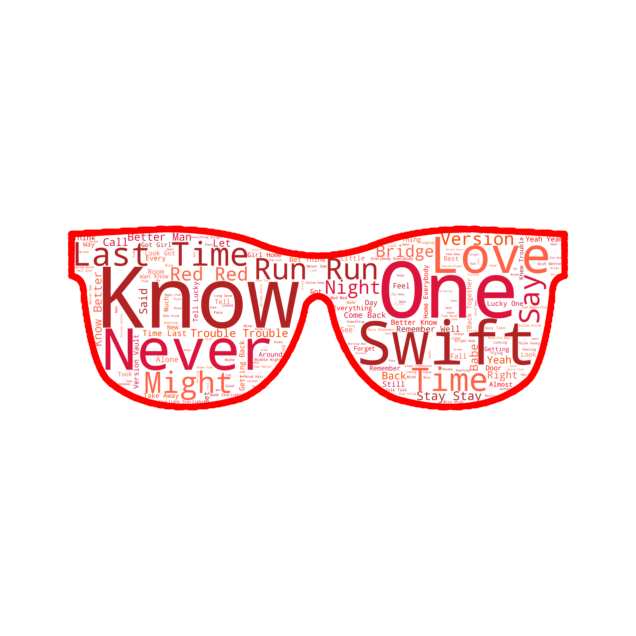

In [28]:
# 
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()